# Lab: K-Fold CV 
## CMSE 381 - Fall 2022
## Oct 5,  2022. Lecture 11



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Roll your own $k$-fold

Ok, let's try to get a handle on what this $k$-fold CV is doing with our data. To do that, we're going to build our own $k$-fold splitter before we use the provided tools in `scikitlearn`. Of course, this is not going to be optimized at all, the goal is just to figure out how the innards are working. 

&#9989; **<font color=red>Do this:</font>** Below is the skeleton of code that will return the $k$-fold train/test splits. Update the code where noted to make it work. 

How do you check that your code is doing what you want? 
- Make sure you end up with $k$ splits 
- Make sure that each of the testing splits has $n/k$ data points
- Make sure that the rest of the data points end up in the training set. 
- A good check is to see that you have all $n$ data points between the training and testing set every time.

In [139]:
def mykfold(n,k):
    # Input: integers n and k.
    #        This version is only going to allow us to work with  
    #        a $k$ that is actually divisible by $n$ 
    # Output: a list of the train/test splits to be used.
    
    # This command is just going to make a warning so that if you pass in 
    # n and k not divisble, the code will kick you out.     
    assert (n % k == 0), "k doesn't divide n, this code can't handle it"
    
    # Make an array of the indices:
    all_my_indices = np.array(range(n))
    
    
    # First, shuffle your array to make sure we're working with randomized order.
    # ----your code here to shuffle----# 
    np.random.shuffle(all_my_indices)
    
    # Write an equation that will figure out the length of each fold below
    length_of_fold = n//k #<----- fix this
    
    
    # Now we're going to keep a list of all your splits. Modify the code below so that 
    # you can keep track of the training and testing splits.
    AllSplits = []

    for i in range(k):
        
        test_set = all_my_indices[int(i*length_of_fold) : int((i+1)*length_of_fold)] #<------ fix this
        training_set = np.delete(all_my_indices,range(int(i*length_of_fold), int((i+1)*length_of_fold))) #<------ fix this, too
        AllSplits.append({'train': training_set, 'test':test_set})
    
    return AllSplits
 
n = 30
k = 5
mykfold(n,k)
    

[{'train': array([11, 17,  4, 14,  3, 27, 24,  9, 10, 29, 28, 25, 21, 20, 19,  2, 16,
          6,  0, 18,  1, 26, 22, 23]),
  'test': array([ 7,  5,  8, 15, 12, 13])},
 {'train': array([ 7,  5,  8, 15, 12, 13, 24,  9, 10, 29, 28, 25, 21, 20, 19,  2, 16,
          6,  0, 18,  1, 26, 22, 23]),
  'test': array([11, 17,  4, 14,  3, 27])},
 {'train': array([ 7,  5,  8, 15, 12, 13, 11, 17,  4, 14,  3, 27, 21, 20, 19,  2, 16,
          6,  0, 18,  1, 26, 22, 23]),
  'test': array([24,  9, 10, 29, 28, 25])},
 {'train': array([ 7,  5,  8, 15, 12, 13, 11, 17,  4, 14,  3, 27, 24,  9, 10, 29, 28,
         25,  0, 18,  1, 26, 22, 23]),
  'test': array([21, 20, 19,  2, 16,  6])},
 {'train': array([ 7,  5,  8, 15, 12, 13, 11, 17,  4, 14,  3, 27, 24,  9, 10, 29, 28,
         25, 21, 20, 19,  2, 16,  6]),
  'test': array([ 0, 18,  1, 26, 22, 23])}]

Now we are going to fix the code above to allow for $n$ not divisible by $k$. We want to take all the leftover data points from dividing the folds evenly and just add them to the first folds. Below is one way to figure out how long each fold should be in this more general case. 

In [116]:
n = 33
k = 5

length_of_each_fold = [n//k for i in range(k)]

for i in range(n % k):
    length_of_each_fold[i]+=1
    
print(length_of_each_fold)
print(np.sum(length_of_each_fold))

[7, 7, 7, 6, 6]
33


&#9989; **<font color=red>Do this:</font>** Copy your `mykfold` function down here.  Modify it so that it can accept $n$ and $k$ that aren't divisible. 

In [127]:
# Your code here #
def mykfold(n,k):
    # Input: integers n and k.
    #        This version is only going to allow us to work with  
    #        a $k$ that is actually divisible by $n$ 
    # Output: a list of the train/test splits to be used.
    
    # This command is just going to make a warning so that if you pass in
    
    # Make an array of the indices:
    all_my_indices = np.array(range(n))
    
    
    # First, shuffle your array to make sure we're working with randomized order.
    # ----your code here to shuffle----# 
    all_my_indices = np.random.shuffle(all_my_indices)
    
    # Write an equation that will figure out the length of each fold below
    length_of_each_fold = [n//k for i in range(k)]

    for i in range(n % k):
        length_of_each_fold[i]+=1    
    
    # Now we're going to keep a list of all your splits. Modify the code below so that 
    # you can keep track of the training and testing splits.
    AllSplits = []
    for i in range(k):
        
        test_set = all_my_indices[int(i*length_of_each_fold[i]) : int((i+1)*length_of_each_fold[i])] #<------ fix this
        training_set = np.delete(all_my_indices, np.s_[int(i*length_of_each_fold[i]) : int((i+1)*length_of_each_fold)])
        AllSplits.append({'train': training_set, 'test':test_set})
    
    return AllSplits

n = 33
k = 5
mykfold(n,k)
    

TypeError: 'NoneType' object is not subscriptable

# 2. Letting scikitlearn do the work for us. 

Ok, now that we understand the innards, we can let `scikitlearn` do this for us. Let's get our toy data set back to mess with this.  



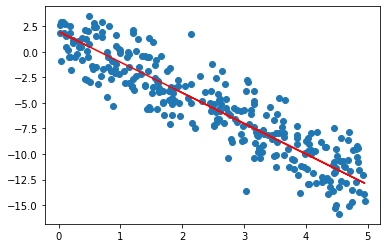

In [118]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

In [119]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

# Notice that like the leave one out version, trying to print kf still doesn't 
# give us much that's useful
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [120]:
for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299] 
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56

There is a BIG PROBLEM with this code.  We haven't done something!!! Something important!!!

&#9989; **<font color=red>Q:</font>** What didn't we do? This is an easy fix, checkout the [documentation for `KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), then modify the code below to fix the problem. 



In [121]:
# Fix this code! 
kf = KFold(n_splits=3, shuffle = True)

for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

TRAIN: [  0   4   9  10  12  13  14  16  19  21  22  23  24  25  26  27  28  30
  32  34  35  36  37  38  39  40  41  42  45  46  48  50  51  52  53  54
  56  58  59  61  62  65  66  67  68  69  70  71  73  74  75  77  80  83
  84  85  87  88  89  90  91  93  94  96  99 100 103 105 106 107 108 109
 110 113 114 116 117 118 119 121 122 124 126 129 131 132 133 134 135 136
 137 138 139 140 142 144 146 147 149 152 153 154 155 156 158 159 160 163
 164 167 170 171 172 173 174 175 177 178 179 180 182 183 184 186 187 190
 191 192 193 195 196 197 199 201 204 205 206 208 209 212 213 214 219 220
 221 222 224 225 226 227 228 229 230 231 232 235 236 237 238 239 240 241
 243 244 245 246 248 249 251 252 254 255 256 257 258 259 260 261 263 264
 265 266 269 271 272 273 275 276 277 278 279 281 282 284 285 286 287 288
 289 295] 
TEST: [  1   2   3   5   6   7   8  11  15  17  18  20  29  31  33  43  44  47
  49  55  57  60  63  64  72  76  78  79  81  82  86  92  95  97  98 101
 102 104 111 112 115 120 12

Now that we have our train/test split generator set up, let's take a look at the result. Note that this is just going to color by the last split generated in that for loop up above. 

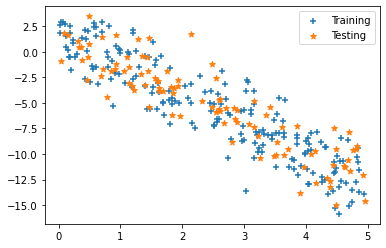

In [122]:
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Q:</font>** Below is my code from last class to train our linear regression model, again just using that last train/test split. Fix this so that it uses every k-fold train/test split ($k=5$) and returns the average of the MSEs. 


In [126]:
# Your code goes here
MSE = []
kf = KFold(n_splits=3, shuffle = True)

for train_index, test_index in kf.split(X_toy):
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]


    model = LinearRegression()
    model.fit(X_train.reshape(-1,1),y_train)
    y_hat = model.predict(X_test.reshape(-1,1))

    mse = mean_squared_error(y_hat,y_test)
    MSE.append(mse)
    
print(np.mean(MSE))

3.9306362274255395


&#9989; **<font color=red>Q:</font>** What happens if you set `n_splits = n`? 

it turns into a LOOCV


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 2. Setting this up on a slightly more complicated data set. 

Ok, let's see how this is used for determining parameters. Below, we're going to generate a data set that is clearly non-linear. 

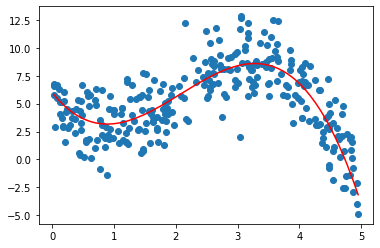

In [128]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m1 = -7,m2 = 5, m3 = -.8, b = 6):
    return m3 * t**3 + m2*t**2 + m1*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)

# Doing this so the plot isn't ugly
X_plot = X_toy.copy()
X_plot.sort()
plt.plot(X_plot,f(X_plot),c = 'red')

&#9989; **<font color=red>Do this:</font>** Using $k$-fold cross validation for $k=5$, set up code to approximate the test error for each of the polynomial models below. 
- $y = \beta_0 + \beta_1 X$
- $y = \beta_0 + \beta_1 X + \beta_2 X^2$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5+ \beta_6 X^6$

Then plot your resulting test errors for each to deterimine best choice of polynomial for this data set. 

In [146]:
# Your code here
MSE = []
kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(X_toy):
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]


    model = LinearRegression()
    model.fit(X_train.reshape(-1,1),y_train)
    y_hat = model.predict(X_test.reshape(-1,1))

    MSE.append(mean_squared_error(y_hat,y_test))
    
np.mean(MSE)

10.53020486424797

If you still have some time, try to see if you can figure out the test errors for everything through a degree 10 polynomial. 



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.